# Problem Statement

In the rapidly evolving world of eCommerce, accurate product categorization is crucial for ensuring seamless customer experiences, reducing search friction, and increasing product discoverability. However, the sheer volume of diverse products poses a significant challenge. Current classification systems struggle to handle ambiguities, unconventional naming conventions, and multi-language data. This hackathon aims to address these challenges by inviting participants to create innovative solutions that enhance product categorization efficiency, accuracy, and scalability.

**Objective**: Develop a text classification model that categorizes products with maximum accuracy based on the product description.

## Objectives

This hackathon focuses on creating accurate and efficient solutions for eCommerce product categorization. The key objectives are:

### 1. Data Exploration and Preparation
- Explore and analyze the dataset to understand key features, detect missing data, and identify ambiguities.
- Preprocess the dataset for consistency, noise reduction, and missing value handling.

### 2. Descriptive Analysis
- Perform descriptive analysis to identify data patterns, category distributions, and inconsistencies, especially for text data.
- Visualize data insights using word clouds and other text visualization techniques.

### 3. Feature Engineering/Text to Features
- Transform raw product data into informative features suitable for machine learning models.
- Convert text descriptions into numerical features using techniques such as TF-IDF, word embeddings, or custom methods.

### 4. Predictive Modeling
- Design and develop machine learning models using text data for accurate product categorization.
- Consider classification, clustering, or hybrid models based on problem requirements.
- Ensure the model can handle ambiguous products.

### 5. Fine Tuning
- Optimize models by tuning hyperparameters and selecting relevant features.
- Evaluate and compare models using metrics such as accuracy, F1 score, precision, and recall.
- Validate models through cross-validation or a separate test dataset.

### 6. Enhance Categorization Accuracy
- Improve model accuracy by incorporating domain-specific knowledge or ensemble methods.
- Ensure solutions can accurately categorize unconventional product names and handle ambiguities.
- Develop models that support scalable, real-time categorization.

## Expected Outcomes

By the end of the hackathon, participants are expected to deliver the following outcomes:

### 1. Predictive Model
- A text-based predictive machine learning model capable of accurate product categorization across multiple categories.
- The model will be evaluated using accuracy, F1 score, precision, and recall, ensuring high classification performance.

### 2. Visualizations
- A comprehensive set of visualizations will accompany the model, providing insights into data patterns, category distributions, word clouds, etc.



# importing the libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Analyze the Dataset:

In [22]:
df=pd.read_csv('C:/Rohan Data/train_product_data.csv')

In [23]:
df.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts             Clothing    
1                                         AW Bellies             Footwear    
2                Alisha Solid Women's Cycling Shorts             Clothing    
3                Alisha Solid Women's Cycling Shorts             Clothing    
4  dilli bazaaar Bellies, Corporate Casuals, Casuals             Footwear    

                pid  retail_price  discounted_price  \
0  SRTEH2FF9KEDEFGF         999.0             379.0   
1  SHOEH4GRSUBJGZXE         999.0             499.0   
2  SRTEH2F6HUZMQ6SJ         699.0             267.0   
3  SRTEH2FVVKRBAXHB        1199.0             479.0   
4  SHOEH3DZBFR88SCK         699.0             349.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
2  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
3  ["http://img6a.flixcart.com/image/short/p/j/z/...                    False   
4  ["http://img6a.flixcart.com/image/shoe/b/p/n/p...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
2  Key Features of Alisha Solid Women's Cycling S...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Key Features of dilli bazaaar Bellies, Corpora...  No rating available   

        overall_rating          brand  \
0  No rating available         Alisha   
1  No rating available             AW   
2  No rating available         Alisha   
3  No rating available         Alisha   
4  No rating available  dilli bazaaar   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Ideal For"...  
2  {"product_specification"=>[{"key"=>"Number of ...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Occasion",...

In [24]:
df.shape

(14999, 15)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [26]:
df.describe()

retail_price  discounted_price
count   14942.000000      14942.000000
mean     3128.424040       2087.732298
std      9154.463342       7712.247869
min        35.000000         35.000000
25%       699.000000        349.000000
50%      1000.000000        499.000000
75%      1989.750000        999.000000
max    571230.000000     571230.000000

In [27]:
x=['product_category_tree','description']

In [28]:
df1=df[x]
df1.head()

product_category_tree                                        description
0             Clothing   Key Features of Alisha Solid Women's Cycling S...
1             Footwear   Key Features of AW Bellies Sandals Wedges Heel...
2             Clothing   Key Features of Alisha Solid Women's Cycling S...
3             Clothing   Key Features of Alisha Solid Women's Cycling S...
4             Footwear   Key Features of dilli bazaaar Bellies, Corpora...

# EDA

# handling the missing values

In [29]:
df1.isnull().sum()

product_category_tree    0
description              1
dtype: int64

In [30]:
df1.dropna(inplace=True)

In [31]:
df1.shape

(14998, 2)

In [32]:
df1.describe()

product_category_tree  \
count                  14998   
unique                    14   
top                Clothing    
freq                    5315   

                                              description  
count                                               14998  
unique                                              13163  
top     Fashion Jewellery Alloy Necklace - Buy Fashion...  
freq                                                   38

### Here we creating a table for finding the percentage of ech category in total

In [33]:
# here firstly create a table values count and store in a varible

SS = df1['product_category_tree'].value_counts()

# Convert to DataFrame by reset the index

SS_df = SS.reset_index()
SS_df.columns = ['Product_Category', 'Count']

# here we add the percentage columns for data distribution

SS_df['percentage']=round((SS_df['Count']/SS_df['Count'].sum())*100,2)
SS_df

Product_Category  Count  percentage
0                     Clothing    5315       35.44
1                    Jewellery    3218       21.46
2                     Footwear    1083        7.22
3                   Automotive     937        6.25
4        Mobiles & Accessories     768        5.12
5   Home Decor & Festive Needs     714        4.76
6             Kitchen & Dining     610        4.07
7                    Computers     531        3.54
8                      Watches     526        3.51
9             Tools & Hardware     379        2.53
10      Toys & School Supplies     271        1.81
11           Pens & Stationery     264        1.76
12                   Baby Care     224        1.49
13       Bags, Wallets & Belts     158        1.05

In [34]:
# here we add the percentage columns for data distribution

SS_df['percentage']=round((SS_df['Count']/SS_df['Count'].sum())*100,2)
SS_df

Product_Category  Count  percentage
0                     Clothing    5315       35.44
1                    Jewellery    3218       21.46
2                     Footwear    1083        7.22
3                   Automotive     937        6.25
4        Mobiles & Accessories     768        5.12
5   Home Decor & Festive Needs     714        4.76
6             Kitchen & Dining     610        4.07
7                    Computers     531        3.54
8                      Watches     526        3.51
9             Tools & Hardware     379        2.53
10      Toys & School Supplies     271        1.81
11           Pens & Stationery     264        1.76
12                   Baby Care     224        1.49
13       Bags, Wallets & Belts     158        1.05

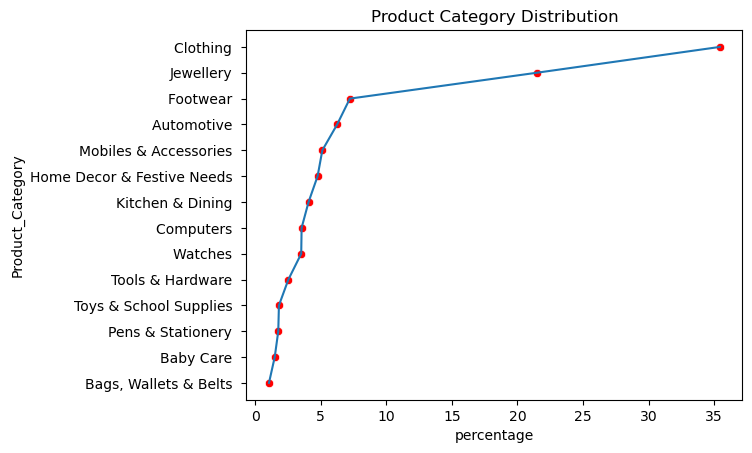

In [35]:
# plt.figure(figsize=(5,5))

sns.lineplot(SS_df,x='percentage',y='Product_Category',)
sns.scatterplot(SS_df,x='percentage',y='Product_Category',color='red')
plt.title('Product Category Distribution')
plt.show()

# 2. Visualize the Data:

In [36]:
#Identify Non-Numeric Values

import pandas as pd

# Example DataFrame
data = {'product_category_tree': ['123.45', '678.90', 'Clothing ']}
df = pd.DataFrame(data)

# Check for non-numeric values
df['product_category_tree'] = pd.to_numeric(df['product_category_tree'], errors='coerce')
print(df)


   product_category_tree
0                 123.45
1                 678.90
2                    NaN


###### Clean Your Data

In [37]:
#Remove Non-Numeric Values

# Example DataFrame
data = {'product_category_tree': ['123.45', '678.90', 'Clothing ']}
df = pd.DataFrame(data)

# Remove rows with non-numeric values
df['product_category_tree'] = pd.to_numeric(df['product_category_tree'], errors='coerce')
df = df.dropna()  # Drop rows with NaN values



In [38]:
#Replace Non-Numeric Values:


# Example DataFrame
data = {'product_category_tree': ['123.45', '678.90', 'Clothing ']}
df = pd.DataFrame(data)

# Replace non-numeric values with a specific number (e.g., 0)
df['product_category_tree'] = pd.to_numeric(df['product_category_tree'], errors='coerce').fillna(0)


###### Ensure Proper Data Types

In [39]:
df = pd.read_csv('C:/Rohan Data/train_product_data.csv')
df['product_category_tree'] = pd.to_numeric(df['product_category_tree'], errors='coerce')

###### Check for Extra Spaces

In [40]:
# Example DataFrame with extra spaces
data = {'roduct_category_tree': ['123.45 ', ' 678.90', ' Clothing']}
df = pd.DataFrame(data)

# Strip extra spaces
df['roduct_category_tree'] = df['roduct_category_tree'].str.strip()

# Convert to numeric
df['roduct_category_tree'] = pd.to_numeric(df['roduct_category_tree'], errors='coerce')


###### Visualization using pie chart

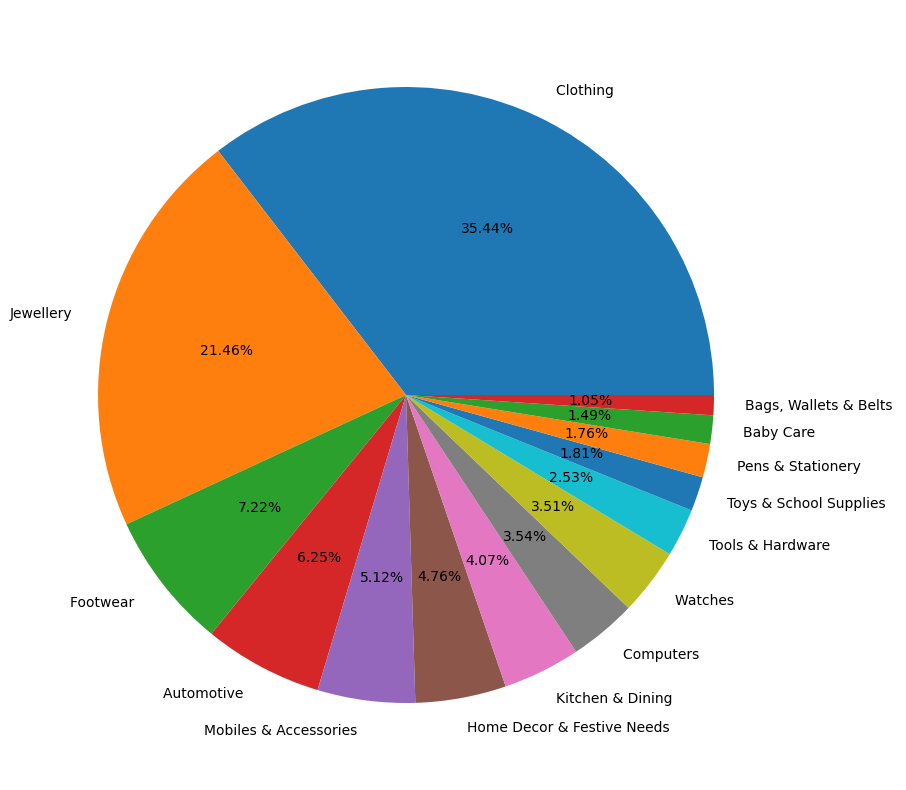

In [41]:
plt.figure(figsize=(10,10))
plt.pie(df1['product_category_tree'].value_counts(),labels=df1['product_category_tree'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [43]:
cat_t=df1['product_category_tree'].unique()
cat_t

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

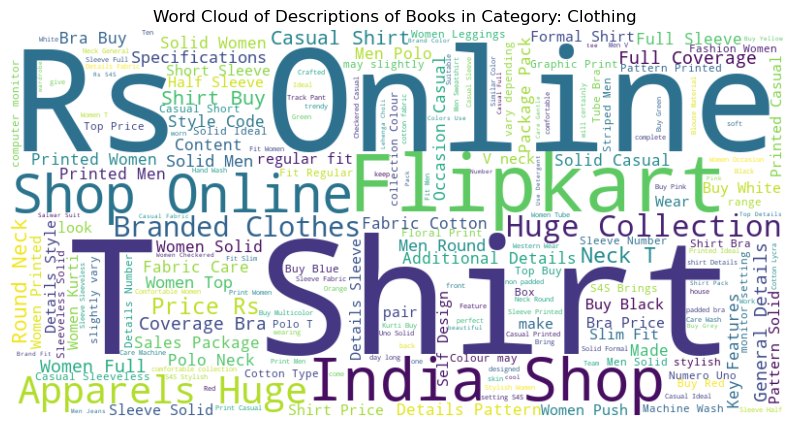

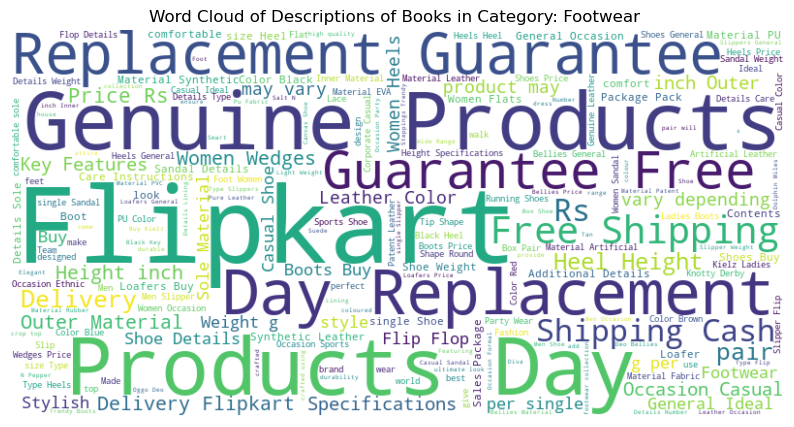

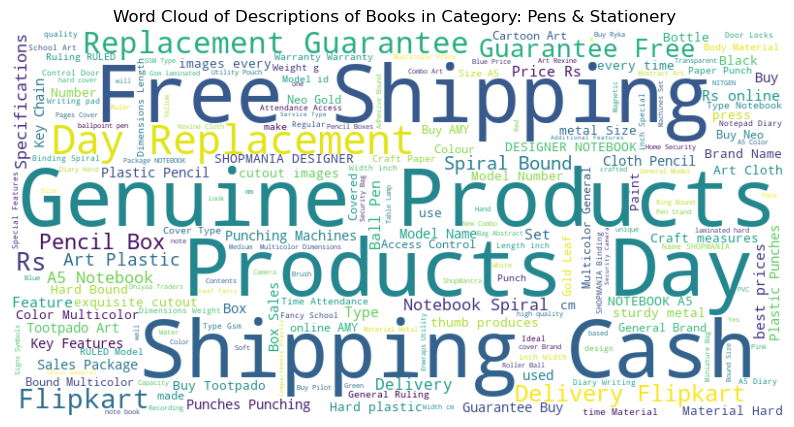

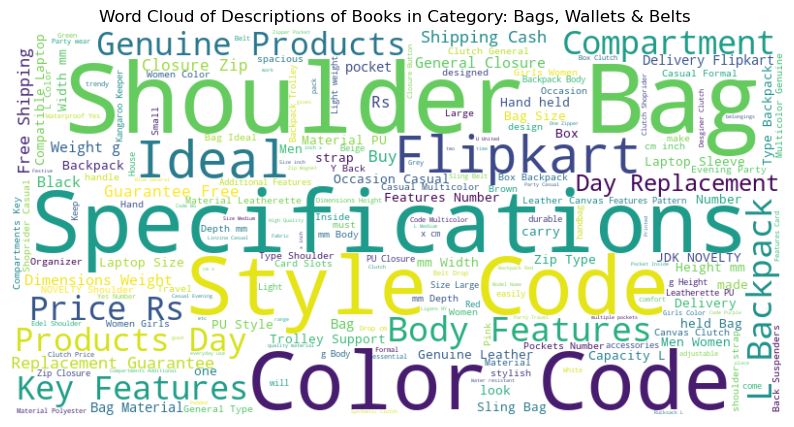

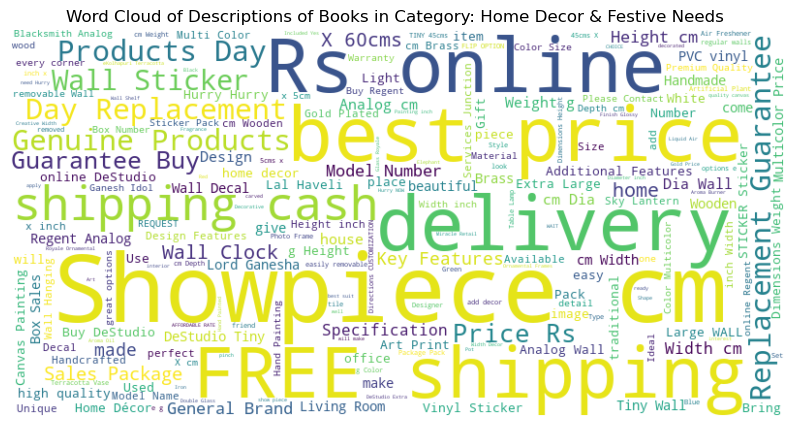

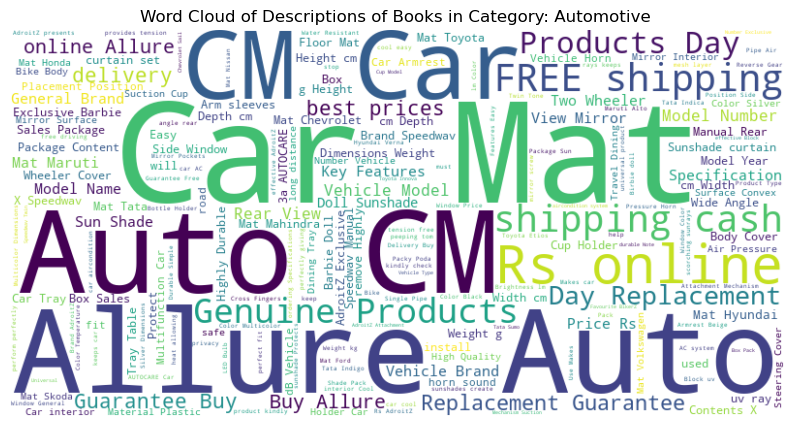

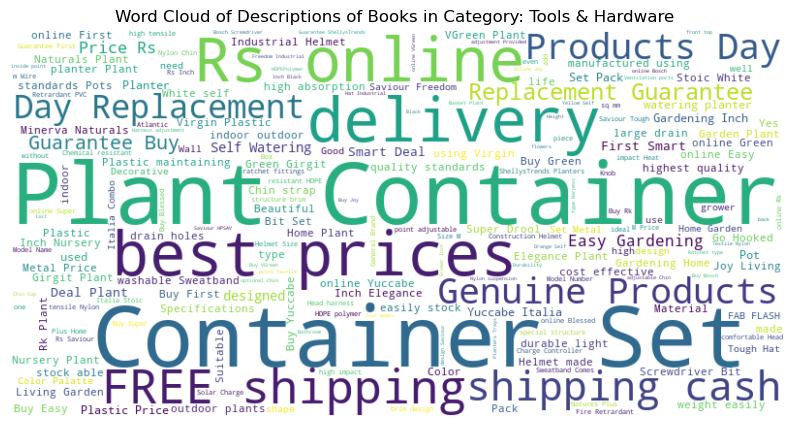

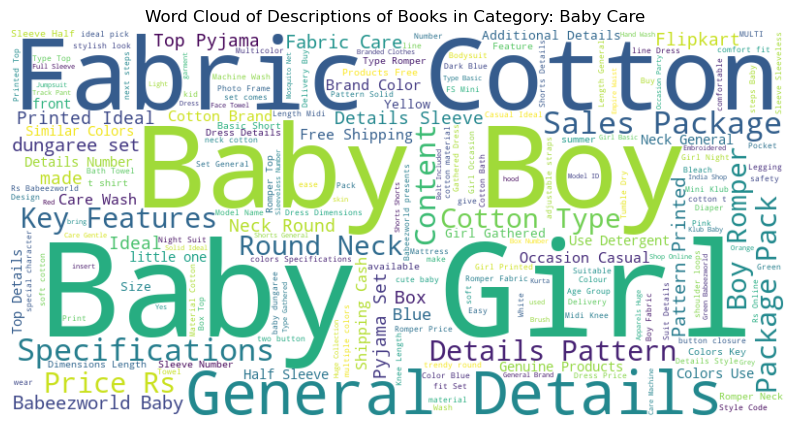

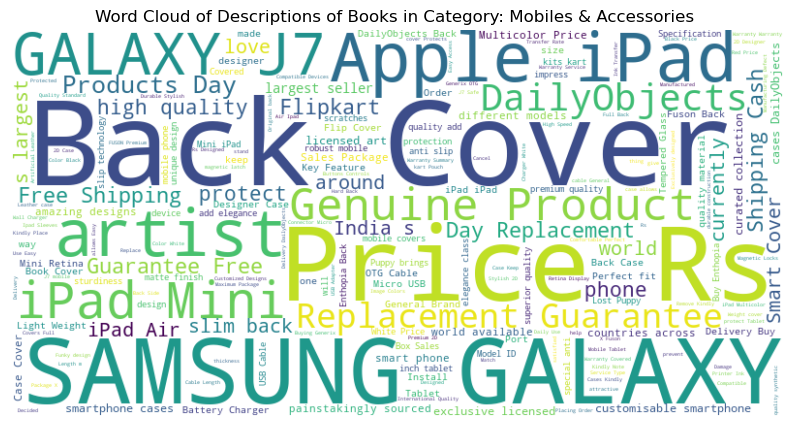

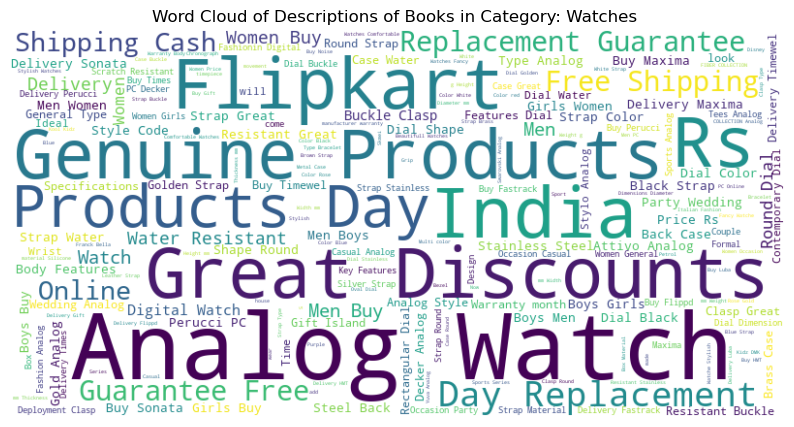

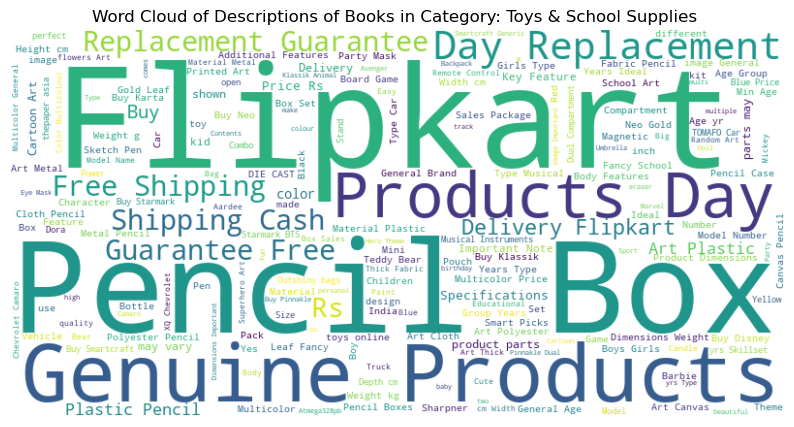

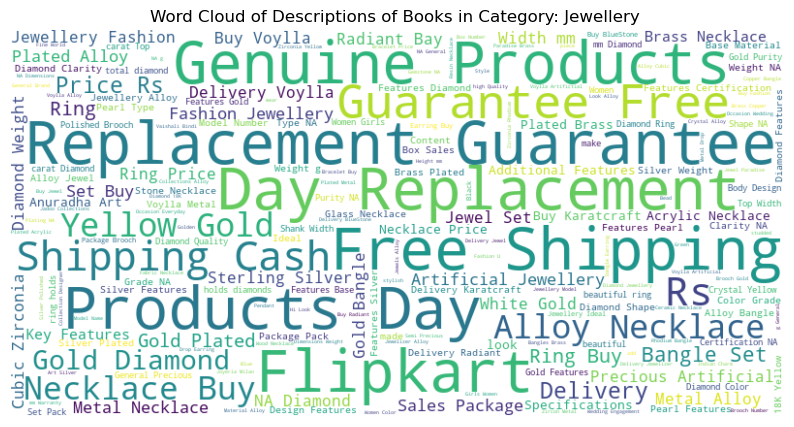

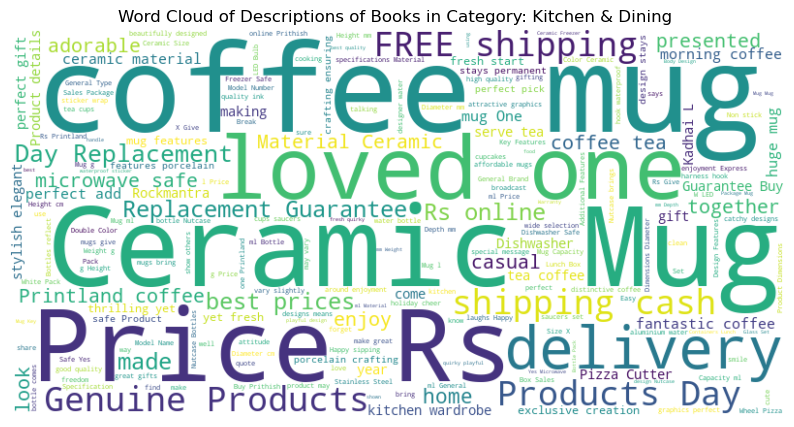

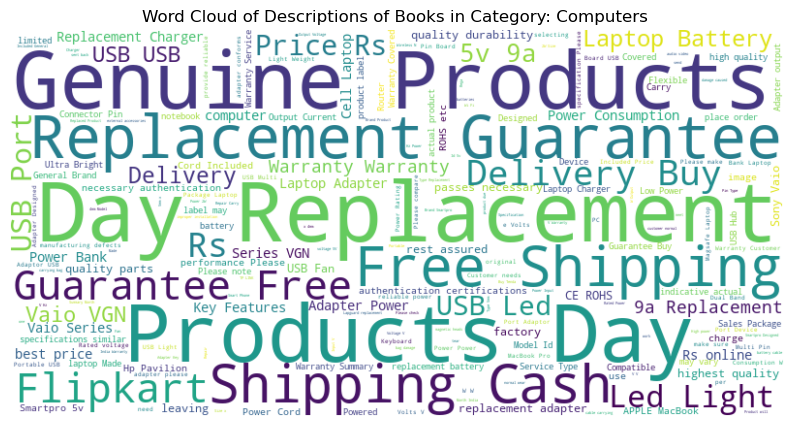

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'cat_t' is a list of unique product categories
cat_t = df1['product_category_tree'].unique()

for i in cat_t:
    # Word cloud for book descriptions in each category
    all_text = ' '.join(df1[df1['product_category_tree'] == i]['description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Descriptions of Books in Category: {i}')
    plt.axis('off')
    plt.show()

# 3 Data preprocessing

Cleaning the data here by using the [spacy](https://spacy.io/) library which is use here for text data cleanig

In [19]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [50]:
import re

In [47]:
import spacy
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 882.6 kB/s eta 0:00:14
     -- ------------------------------------ 0.8/12.8 MB 958.5 kB/s eta 0:00:13
     -- ------------------------------------ 0.8/12.8 MB 958.5 kB/s eta 0:00:13
     --- ----------------------------------- 1.0/12.8 MB 853.0 kB/s eta 0:00:14
     --- ----------------------------------- 1.0/12.8 MB 853.0 kB/s eta 0:00:14
     --- ----------------------------------- 1.3/12.8 MB 849.7 kB/s eta 0:00:14
     ---- ---------------------------------- 1.6/12.8 MB 839.1 kB/s eta 0:00:14
     ---- ---------------------------------- 1.6/12.8 MB 839.1 kB/s eta 0:00:14
     ----- --------------------------------- 1.8/12.8 MB 838.9 kB/s eta 0:00:14
     ----- --------------------------------- 1.8/12.8 MB 838.9 k

In [73]:
# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    # Converting to lowercase
    text = text.lower()

    # Removing special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Using spaCy to lemmatize, remove stop words, and punctuations
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# The clean txt function is use to clean the text like
* It convert the all word into small leter by usning the simple lower finction
* then remove the all special word from the text dataset
* Using spaCy to **[lemmatize](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/)**, remove **[stop words](https://www.coursera.org/articles/what-are-stop-words)**, and [punctuations](https://www.geeksforgeeks.org/how-to-remove-punctuations-in-nltk/)


### here apply the clean text function on the description columns for data cleaning

In [74]:
df1['description']=df1['description'].apply(clean_text)

# Encoding
Encoding the categorical data into the numerical by the help of using the sklearn function label encoder

In [52]:
from operator import le
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['product_category_tree']=le.fit_transform(df1['product_category_tree'])

df1['product_category_tree'].value_counts()

product_category_tree
3     5315
7     3218
5     1083
0      937
9      768
6      714
8      610
4      531
13     526
11     379
12     271
10     264
1      224
2      158
Name: count, dtype: int64

 # 4. Feature Engineering/Text to Features:

## Split the dataset into independent and dependent features

### Convert text to numerical representation using TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text to numerical representation using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['description'])
y = df1['product_category_tree']

In [75]:
X.shape

(14998, 16307)

##### This line creates an instance of the TfidfVectorizer class
###### This instance will be used to transform the text data into a numerical representation using the TF-IDF (Term Frequency-Inverse Document Frequency) method.

# 5. Address Class Imbalance:

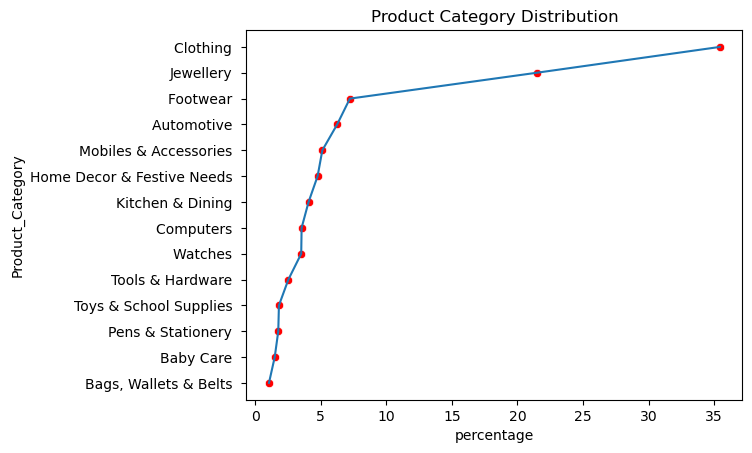

In [54]:
# plt.figure(figsize=(5,5))
sns.lineplot(SS_df,x='percentage',y='Product_Category',)
sns.scatterplot(SS_df,x='percentage',y='Product_Category',color='red')
plt.title('Product Category Distribution')
plt.show()

### Analysis:
* High Proportions: Categories like Clothing and Jewellery dominate the dataset with a significant percentage of the instances.
* Low Proportions: Categories such as Bags, Wallets & Belts and Baby Care have much lower proportions, indicating they are underrepresented.
* Imbalance: The chart clearly shows that some categories are heavily favored over others. This imbalance can impact machine learning models, as models may become biased towards the more frequent categories

## Split the data into training and testing sets by using the sklearn library and its train_test_split function

In [78]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (11998, 16307)
Testing set shape: (3000, 16307)


###### Using the smote here to treating the imbalce dataset treating

### installing imbalanced-using the smote here to treating the imbalce dataset treating

In [28]:
pip install imbalanced-learn -i https://pypi.org/simple

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install imbalanced-learn -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install --upgrade pip setuptools wheel


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pip in c:\users\rohan\anaconda3\lib\site-packages (23.2.1)
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/e1/58/e0ef3b9974a04ce9cde2a7a33881ddcb2d68450803745804545cdd8d258f/setuptools-72.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for wheel from https://files.pythonhosted.org/packages/7d/cd/d7460c9a869b16c3dd4e1e403cce337df165368c71d6af229a74699622ce/wheel-0.43.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 656.4 kB/s eta 0:00:03
   ---- -----------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.


In [31]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.0 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.0 MB 1.1 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.0 MB 1.1 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.0 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/11.0 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.9/11.0 MB 1.3 MB/s eta 0:00:07
   ----------- ---------------------------- 3.1/11.0 MB 1.3 MB/s eta 0:00:07
   ----------

  You can safely remove it manually.


In [32]:
pip install scikit-learn==1.2.2

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.3 MB 989.2 kB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.3 MB 1.2 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.3 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.3 MB 1.2 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.3 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.3 MB 1.3 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.3 MB 1.2 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.3 MB 1.2 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.3 MB 1.3 MB/s eta 0:00:05
   ------------- -------------------------- 2.9/8.3 MB 1.2 MB/s eta 0:00:05
   --------------- ------------------------ 3.1/8.3 MB 1.2 MB/s eta 0:00:05
   ---------------- ----

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 6. Develop Machine Learning- Multi-class text classifier:

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = model.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.85      0.86      0.85        51
           2       0.91      0.97      0.94        31
           3       0.99      0.99      0.99      1083
           4       0.94      0.95      0.95       107
           5       1.00      0.98      0.99       220
           6       0.98      0.99      0.98       154
           7       1.00      1.00      1.00       608
           8       0.95      0.98      0.97       114
           9       0.97      0.97      0.97       171
          10       0.84      0.88      0.86        41
          11       1.00      0.99      0.99        79
          12       0.86      0.79      0.83        48
          13       1.00      1.00      1.00        95

    accuracy                           0.98      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.98      0.98      0.98      3000



In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 10, 'solver': 'lbfgs'}


In [61]:
best_model = LogisticRegression(max_iter=1000, C=10, solver='lbfgs')
best_model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict and evaluate
y_pred = best_model.predict(X_test)



# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.93      0.80      0.86        51
           2       0.94      0.97      0.95        31
           3       0.99      1.00      0.99      1083
           4       0.95      0.96      0.96       107
           5       1.00      0.99      0.99       220
           6       0.97      0.99      0.98       154
           7       1.00      1.00      1.00       608
           8       0.96      0.98      0.97       114
           9       0.98      0.95      0.96       171
          10       0.81      0.85      0.83        41
          11       1.00      0.99      0.99        79
          12       0.86      0.75      0.80        48
          13       1.00      1.00      1.00        95

    accuracy                           0.98      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.98      0.98      0.98      3000



Text(0.5, 1.0, 'Confusion Matrix')

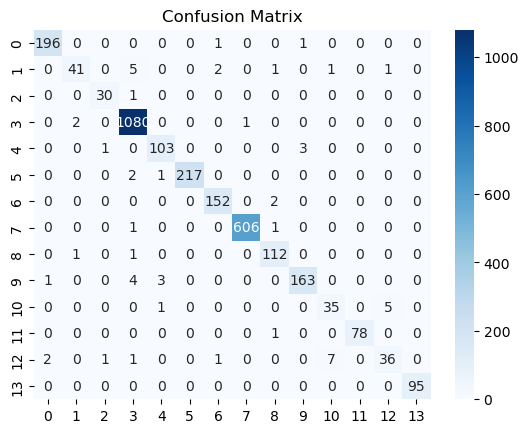

In [63]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')


In [64]:
import pickle
op=open('model_ml_nlp.pkl','wb')
pickle.dump(best_model,op)
op.close()

In [65]:
with open('model_ml_nlp.pkl', 'rb') as file:
    model = pickle.load(file)

In [66]:
#Make predictions on new data
new_data = X_train
predictions = model.predict(new_data)

In [67]:
# Classification report
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      0.99      1.00       173
           2       1.00      1.00      1.00       127
           3       1.00      1.00      1.00      4232
           4       1.00      1.00      1.00       424
           5       1.00      1.00      1.00       863
           6       1.00      1.00      1.00       560
           7       1.00      1.00      1.00      2610
           8       1.00      1.00      1.00       496
           9       1.00      1.00      1.00       597
          10       0.96      0.98      0.97       223
          11       1.00      1.00      1.00       300
          12       0.98      0.97      0.98       223
          13       1.00      1.00      1.00       431

    accuracy                           1.00     11998
   macro avg       1.00      1.00      1.00     11998
weighted avg       1.00      1.00      1.00     11998



In [86]:
op=open('model_logi_nlp.pkl','wb')
pickle.dump(best_model,op)
op.close()

# Decision tree

In [94]:
# Pridict and evaluate
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.85      0.86      0.85        51
           2       0.91      0.97      0.94        31
           3       0.99      0.99      0.99      1083
           4       0.94      0.95      0.95       107
           5       1.00      0.98      0.99       220
           6       0.98      0.99      0.98       154
           7       1.00      1.00      1.00       608
           8       0.95      0.98      0.97       114
           9       0.97      0.97      0.97       171
          10       0.84      0.88      0.86        41
          11       1.00      0.99      0.99        79
          12       0.86      0.79      0.83        48
          13       1.00      1.00      1.00        95

    accuracy                           0.98      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.98      0.98      0.98      3000



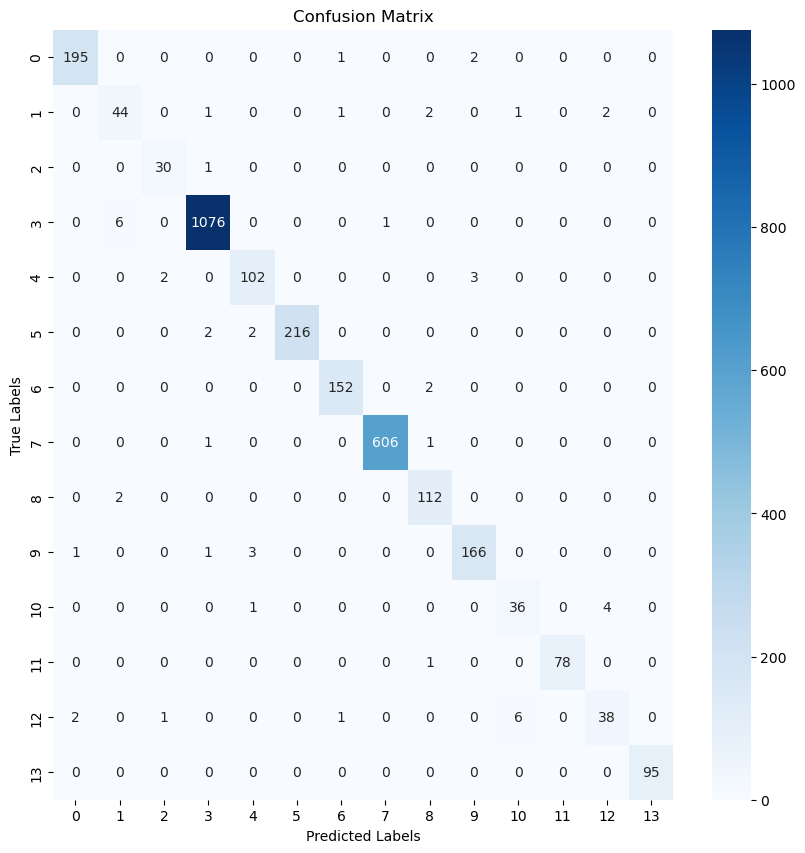

In [95]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Random forest model

In [105]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.85      0.86      0.85        51
           2       0.91      0.97      0.94        31
           3       0.99      0.99      0.99      1083
           4       0.94      0.95      0.95       107
           5       1.00      0.98      0.99       220
           6       0.98      0.99      0.98       154
           7       1.00      1.00      1.00       608
           8       0.95      0.98      0.97       114
           9       0.97      0.97      0.97       171
          10       0.84      0.88      0.86        41
          11       1.00      0.99      0.99        79
          12       0.86      0.79      0.83        48
          13       1.00      1.00      1.00        95

    accuracy                           0.98      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.98      0.98      0.98      3000

Accuracy: 0.982


In [107]:
from sklearn import metrics

# Calculate the F1 score with weighted average
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print the F1 score
print("Random forest F1 score:", f1_score)


Random forest F1 score: 0.9820024046342529


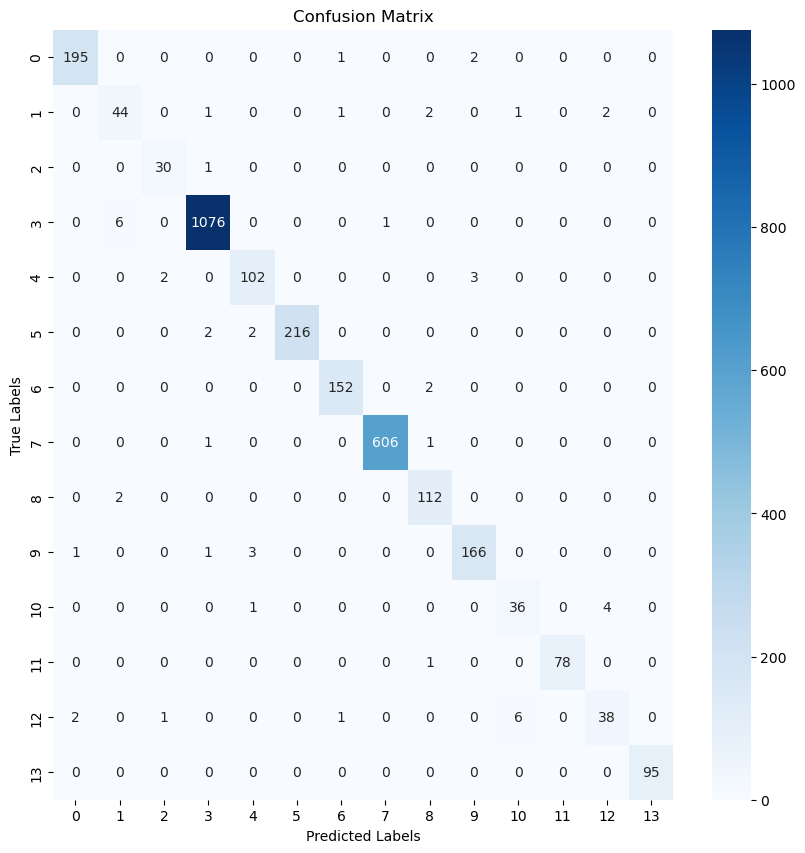

In [108]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model Bulding

In [116]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Deep learning model

#  Import Libraries for deep learning model

Import all the necessary libraries and modules needed for data manipulation, model building, and evaluation

* Sequential, Dense, Dropout, Embedding, LSTM, Bidirectional from TensorFlow/  Keras for building the neural network.
* Tokenizer and pad_sequences for text preprocessing

In [117]:
# Load the dataset
df1 = pd.read_csv('C:/Rohan Data/train_product_data.csv')
df1.head()


uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts             Clothing    
1                                         AW Bellies             Footwear    
2                Alisha Solid Women's Cycling Shorts             Clothing    
3                Alisha Solid Women's Cycling Shorts             Clothing    
4  dilli bazaaar Bellies, Corporate Casuals, Casuals             Footwear    

                pid  retail_price  discounted_price  \
0  SRTEH2FF9KEDEFGF         999.0             379.0   
1  SHOEH4GRSUBJGZXE         999.0             499.0   
2  SRTEH2F6HUZMQ6SJ         699.0             267.0   
3  SRTEH2FVVKRBAXHB        1199.0             479.0   
4  SHOEH3DZBFR88SCK         699.0             349.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
2  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
3  ["http://img6a.flixcart.com/image/short/p/j/z/...                    False   
4  ["http://img6a.flixcart.com/image/shoe/b/p/n/p...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
2  Key Features of Alisha Solid Women's Cycling S...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Key Features of dilli bazaaar Bellies, Corpora...  No rating available   

        overall_rating          brand  \
0  No rating available         Alisha   
1  No rating available             AW   
2  No rating available         Alisha   
3  No rating available         Alisha   
4  No rating available  dilli bazaaar   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Ideal For"...  
2  {"product_specification"=>[{"key"=>"Number of ...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Occasion",...

## Data cleaning

In [118]:
# Remove missing values
df1.dropna(subset=['description', 'product_category_tree'], inplace=True)
# Remove duplicates
df1.drop_duplicates(subset=['description'], inplace=True)
# Text normalization
df1['description'] = df1['description'].str.lower().str.replace('[^\w\s]', '')


## Tokenization and Padding:
* Convert text to sequences of integers.
* Pad sequences to ensure uniform input size

In [120]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(df1['description'])
X = tokenizer.texts_to_sequences(df1['description'])
X = pad_sequences(X, maxlen=100)  # Adjust maxlen as needed
op=open('tokenizer.pkl','wb')
pickle.dump(tokenizer,op)
op.close()


# Distribution of the category into the dataset

# Label Encoding:

Convert categorical target labels to integers.

In [121]:
#  df1 is  DataFrame and 'product_category_tree' is the column we're encoding
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the specified column
y = label_encoder.fit_transform(df1['product_category_tree'])

# Save the fitted LabelEncoder to a file using pickle
with open('label_encoder2.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


## Sequential():
* This initializes a linear stack of layers. You can add layers to the model one by one. The output of one layer will be the input to the next layer.

In [124]:
model_deep=Sequential()
model_deep.add(Embedding(input_dim=10000,output_dim=128,input_length=100))
model_deep.add(Bidirectional(LSTM(64)))
model_deep.add(Dropout(0.5))
model_deep.add(Dense(64,activation='relu'))
model_deep.add(Dropout(0.5))
model_deep.add(Dense(len(label_encoder.classes_),activation='softmax'))


## Embedding Layer

**Embedding():** This layer is used for turning positive integers (indexes) into dense vectors of fixed size. It's often used as the first layer in a model dealing with text data.

### Parameters

- **input_dim=10000:** The size of the vocabulary. In this case, it means we have 10,000 unique words in our vocabulary.
- **output_dim=128:** The size of the dense embedding vectors. Each word will be represented as a 128-dimensional vector.
- **input_length=100:** The length of input sequences. Each input sequence will be padded/truncated to this length.


## Bidirectional Wrapper

**Bidirectional():** This wrapper allows an RNN (like LSTM or GRU) to learn information from both the past and future by processing the input sequence in both forward and backward directions.

### Parameters

- **LSTM(64):** An LSTM (Long Short-Term Memory) layer with 64 units. LSTMs are a type of recurrent neural network (RNN) that can learn long-term dependencies. Using LSTM inside Bidirectional means we have one LSTM layer processing the sequence forward and another processing it backward, and their outputs are concatenated.


## Dropout Layer

**Dropout(0.5):** Dropout is a regularization technique used to prevent overfitting. It randomly sets a fraction of the input units to 0 at each update during training time, which helps in making the model robust. The fraction (0.5) means that 50% of the input units are set to 0.

## Dense Layer

**Dense(64):** A fully connected (dense) layer with 64 units. Each unit receives input from all units of the previous layer.

**activation='relu':** The ReLU (Rectified Linear Unit) activation function. It introduces non-linearity to the model, allowing it to learn more complex patterns. ReLU outputs 0 if the input is negative, and outputs the input itself if the input is positive.

**Dropout(0.5)**: Another dropout layer with a dropout rate of 50%. This helps further in reducing overfitting.

## Output Layer

**Dense(len(label_encoder.classes_)):** A dense layer with a number of units equal to the number of unique classes in your target variable (as given by `label_encoder.classes_`). This layer represents the output of the model.

**activation='softmax':** The softmax activation function. It is used in the output layer of a classification model to output a probability distribution over the classes. Each unit will output a probability value, and all these values will sum to 1, which allows the model to predict the class probabilities for the given input.

In [126]:
model_deep.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [127]:
model_deep.fit(X_train_balanced,y_train_balanced,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 233s 135ms/step - accuracy: 0.3546 - loss: 1.8715 - val_accuracy: 0.8618 - val_loss: 0.4446
Epoch 2/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 215s 131ms/step - accuracy: 0.6538 - loss: 1.0658 - val_accuracy: 0.8838 - val_loss: 0.3910
Epoch 3/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 220s 134ms/step - accuracy: 0.7139 - loss: 0.8907 - val_accuracy: 0.9263 - val_loss: 0.2752
Epoch 4/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 202s 123ms/step - accuracy: 0.7516 - loss: 0.7618 - val_accuracy: 0.9051 - val_loss: 0.3387
Epoch 5/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 172s 105ms/step - accuracy: 0.7791 - loss: 0.6775 - val_accuracy: 0.9218 - val_loss: 0.3020
Epoch 6/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 97s 59ms/step - accuracy: 0.8063 - loss: 0.5991 - val_accuracy: 0.9324 - val_loss: 0.3016
Epoch 7/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 117s 71ms/step - accuracy: 0.8331 - loss: 0.5238 - val_accuracy: 0.9202 - val_loss: 0.3692
Epoch 8/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 117s 71ms/step - accura

In [128]:
# test the model prediction
y_pred=model_deep.predict(X_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


In [129]:
# test the model prediction
y_pred=model_deep.predict(X_test)

# y_test are the true labels and y_pred are the predicted labels (probabilities)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Accuracy: 0.9149259399924041


In [132]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (10530, 100)
Test data shape: (2633, 100)


In [133]:
from sklearn.preprocessing import StandardScaler

# Fit on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)

In [136]:
# dump the model into a pkl file
op=open('model_deep_nlp1.pkl','wb')
pickle.dump(model_deep,op)
op.close()

# **Excel Using the test dataset**

In [138]:
df_x=pd.read_excel('test_results (1).xlsx')
df_x.head()

product_category_tree
0              Jewellery
1              Jewellery
2  Mobiles & Accessories
3              Jewellery
4              Jewellery

In [140]:
# Text normalization
df_x['product_category_tree'] = df_x['product_category_tree'].str.lower().str.replace('[^\w\s]', '')

In [141]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(df_x['product_category_tree'])
X = tokenizer.texts_to_sequences(df_x['product_category_tree'])
X = pad_sequences(X, maxlen=100)  # Adjust maxlen as needed

In [144]:
# import the nlp model here
model=pickle.load(open('C:/Users/Rohan/Downloads/model_deep_nlp1.pkl','rb'))
y_pred=model.predict(X)

80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step


In [145]:
op=open('C:/Users/Rohan/Downloads/label_encoder2.pkl','rb')
label_encoder=pickle.load(op)
op.close()

In [146]:
# test the model prediction
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Print predicted categories
predicted_categories = label_encoder.inverse_transform(y_pred_labels)
print('Predicted Categories (Real Names):', predicted_categories)

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Predicted Categories (Real Names): ['Clothing ' 'Jewellery ' 'Baby Care ' ... 'Clothing ' 'Clothing '
 'Jewellery ']


In [147]:
result = pd.DataFrame(predicted_categories, columns=['predict_category'])
result.head()

predict_category
0                Clothing 
1               Jewellery 
2               Baby Care 
3  Toys & School Supplies 
4               Jewellery

In [149]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10530, 100)
X_test shape: (2633, 100)


In [150]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)  # Use X_train_scaled if you scaled data

# Predict on the test set
y_pred = model.predict(X_test_scaled)  # Use X_test_scaled if you scaled data

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Deep Learning Model F1-score:", f1)


Deep Learning Model F1-score: 0.4267133036476176
